In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [2]:
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)


In [4]:
df = pd.read_csv(
    "/content/drive/MyDrive/College Assignments/ML Assign/Data Sets/MLK/cars_data.csv"
)


In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Cleaning the Data

In [9]:
df.drop(["Market Category", "Model"], axis=1, inplace=True)


In [10]:
for i in list(df.columns):
    print(i, df[i].unique())
    print("\n")


Make ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Year [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990 2015 1996 1997 1998
 2014 1999 2002 2003 2004 1995 2007 2008 2009 2001 2010 2000 2005 2006]


Engine Fuel Type ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


Engine HP [ 335.  300.  230.  320.  172.  160.  130.  158.  240.  

In [11]:
df["Engine Fuel Type"].replace(
    np.nan, list(df["Engine Fuel Type"].mode())[0], inplace=True
)


In [12]:
df["Transmission Type"].replace(
    {"UNKNOWN": list(df["Transmission Type"].mode())[
        0], "DIRECT_DRIVE": "AUTOMATIC"},
    inplace=True,
)


In [13]:
df["Vehicle Style"].replace(
    {
        "Convertible": "Coupe",
        "4dr Hatchback": "Hatchback",
        "2dr Hatchback": "Hatchback",
        "4dr SUV": "SUV",
        "Passenger Minivan": "Minivan",
        "Cargo Minivan": "Minivan",
        "Crew Cab Pickup": "Van",
        "Regular Cab Pickup": "Van",
        "Extended Cab Pickup": "Van",
        "2dr SUV": "SUV",
        "Cargo Van": "Van",
        "Convertible SUV": "SUV",
        "Passenger Van": "Van",
    },
    inplace=True,
)


In [14]:
df["Driven_Wheels"].replace(
    "four wheel drive", "all wheel drive", inplace=True)


In [15]:
df["Engine Fuel Type"].replace(
    {
        "premium unleaded (required)": "unleaded",
        "premium unleaded (recommended)": "unleaded",
        "regular unleaded": "unleaded",
        "flex-fuel (unleaded/E85)": "flex-fuel",
        "flex-fuel (premium unleaded recommended/E85)": "flex-fuel",
        "flex-fuel (premium unleaded required/E85)": "flex-fuel",
        "flex-fuel (unleaded/natural gas)": "flex-fuel",
    },
    inplace=True,
)


In [16]:
df["Vehicle Size"].replace(
    {"Compact": 0, "Midsize": 1, "Large": 2}, inplace=True)


In [17]:
df["Number of Doors"].replace(
    np.nan, df["Number of Doors"].median(), inplace=True)
df["Number of Doors"] = df["Number of Doors"].astype(int)


In [18]:
df["Engine HP"].replace(np.nan, value=df["Engine HP"].mean(), inplace=True)


In [19]:
df["Engine Cylinders"].replace(
    np.nan, list(df["Engine Cylinders"].mode())[0], inplace=True
)
df["Engine Cylinders"] = df["Engine Cylinders"].astype(int)


<Axes: >

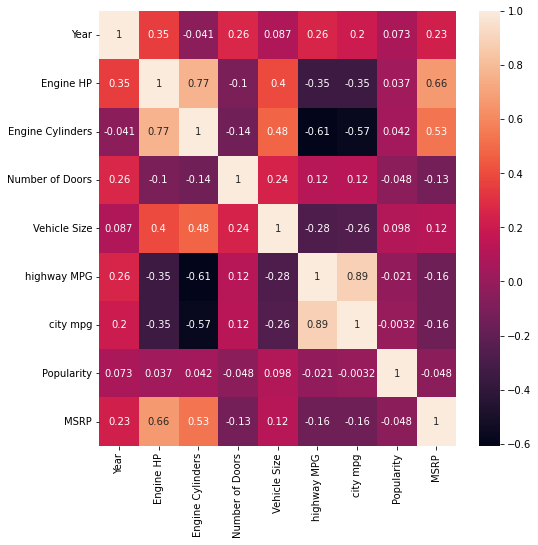

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)


In [21]:
for i in list(df.columns):
    if df[i].dtype == "O":
        print(i, df[i].unique())
        print("\n")


Make ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Engine Fuel Type ['unleaded' 'flex-fuel' 'diesel' 'electric' 'natural gas']


Transmission Type ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL']


Driven_Wheels ['rear wheel drive' 'front wheel drive' 'all wheel drive']


Vehicle Style ['Coupe' 'Sedan' 'Wagon' 'Hatchback' 'SUV' 'Minivan' 'Van']




In [28]:
df = pd.get_dummies(
    data=df,
    columns=["Engine Fuel Type", "Transmission Type",
             "Driven_Wheels", "Vehicle Style"],
    drop_first=True,
)


In [30]:
df.drop("Make", axis=1, inplace=True)


In [31]:
df

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon
0,2011,335.0,6,2,0,26,19,3916,46135,0,0,0,1,0,1,0,1,0,0,0,0,0,0
1,2011,300.0,6,2,0,28,19,3916,40650,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,2011,300.0,6,2,0,28,20,3916,36350,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,2011,230.0,6,2,0,28,18,3916,29450,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,2011,230.0,6,2,0,28,18,3916,34500,0,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6,4,1,23,16,204,46120,0,0,0,1,1,0,0,0,1,0,0,0,0,0
11910,2012,300.0,6,4,1,23,16,204,56670,0,0,0,1,1,0,0,0,1,0,0,0,0,0
11911,2012,300.0,6,4,1,23,16,204,50620,0,0,0,1,1,0,0,0,1,0,0,0,0,0
11912,2013,300.0,6,4,1,23,16,204,50920,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [33]:
df = df.loc[
    :,
    [
        "Year",
        "Engine HP",
        "Engine Cylinders",
        "Number of Doors",
        "Vehicle Size",
        "highway MPG",
        "city mpg",
        "Popularity",
        "Engine Fuel Type_electric",
        "Engine Fuel Type_flex-fuel",
        "Engine Fuel Type_natural gas",
        "Engine Fuel Type_unleaded",
        "Transmission Type_AUTOMATIC",
        "Transmission Type_MANUAL",
        "Driven_Wheels_front wheel drive",
        "Driven_Wheels_rear wheel drive",
        "Vehicle Style_Hatchback",
        "Vehicle Style_Minivan",
        "Vehicle Style_SUV",
        "Vehicle Style_Sedan",
        "Vehicle Style_Van",
        "Vehicle Style_Wagon",
        "MSRP",
    ],
]


In [34]:
df

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon,MSRP
0,2011,335.0,6,2,0,26,19,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,46135
1,2011,300.0,6,2,0,28,19,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,40650
2,2011,300.0,6,2,0,28,20,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,36350
3,2011,230.0,6,2,0,28,18,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,29450
4,2011,230.0,6,2,0,28,18,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6,4,1,23,16,204,0,0,0,1,1,0,0,0,1,0,0,0,0,0,46120
11910,2012,300.0,6,4,1,23,16,204,0,0,0,1,1,0,0,0,1,0,0,0,0,0,56670
11911,2012,300.0,6,4,1,23,16,204,0,0,0,1,1,0,0,0,1,0,0,0,0,0,50620
11912,2013,300.0,6,4,1,23,16,204,0,0,0,1,1,0,0,0,1,0,0,0,0,0,50920


In [35]:
cleancars = df.copy(deep=True)

In [36]:
cleancars.to_csv("cleancars.csv", index=False)


In [37]:
cols = [
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Number of Doors",
    "Vehicle Size",
    "highway MPG",
    "city mpg",
    "Popularity",
    "Engine Fuel Type_electric",
    "Engine Fuel Type_flex-fuel",
    "Engine Fuel Type_natural gas",
    "Engine Fuel Type_unleaded",
    "Transmission Type_AUTOMATIC",
    "Transmission Type_MANUAL",
    "Driven_Wheels_front wheel drive",
    "Driven_Wheels_rear wheel drive",
    "Vehicle Style_Hatchback",
    "Vehicle Style_Minivan",
    "Vehicle Style_SUV",
    "Vehicle Style_Sedan",
    "Vehicle Style_Van",
    "Vehicle Style_Wagon",
    "MSRP",
]


In [38]:
df = df.loc[:, cols]


<Axes: >

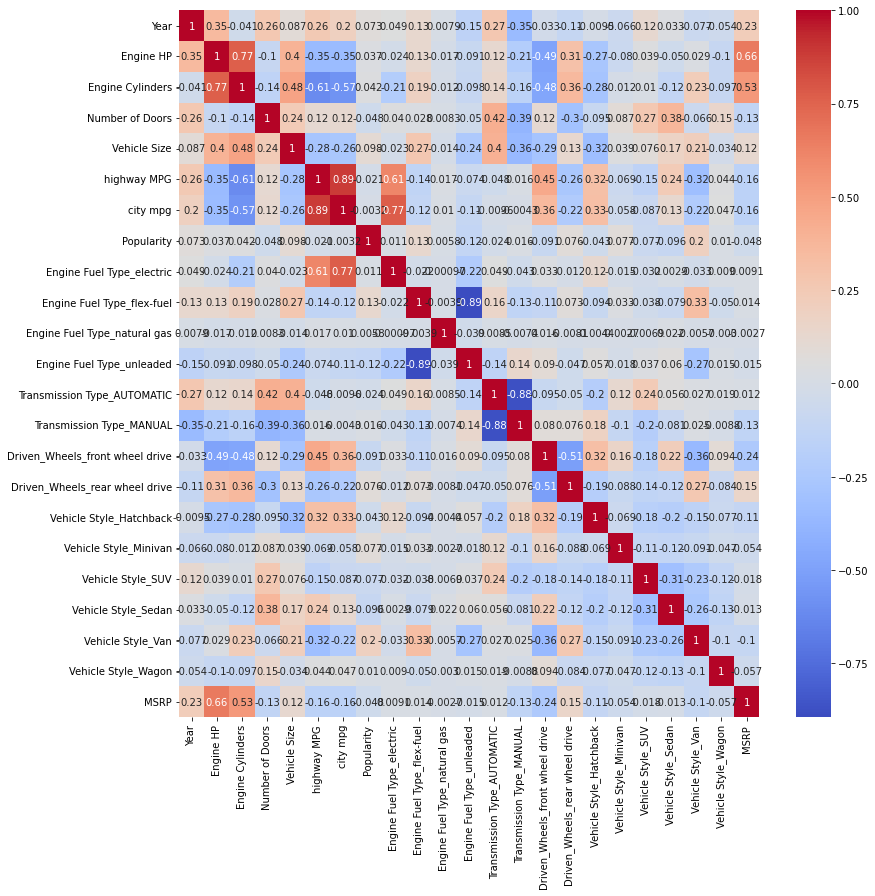

In [39]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [40]:
df.corr()["MSRP"] > 0.10


Year                                True
Engine HP                           True
Engine Cylinders                    True
Number of Doors                    False
Vehicle Size                        True
highway MPG                        False
city mpg                           False
Popularity                         False
Engine Fuel Type_electric          False
Engine Fuel Type_flex-fuel         False
Engine Fuel Type_natural gas       False
Engine Fuel Type_unleaded          False
Transmission Type_AUTOMATIC        False
Transmission Type_MANUAL           False
Driven_Wheels_front wheel drive    False
Driven_Wheels_rear wheel drive      True
Vehicle Style_Hatchback            False
Vehicle Style_Minivan              False
Vehicle Style_SUV                  False
Vehicle Style_Sedan                False
Vehicle Style_Van                  False
Vehicle Style_Wagon                False
MSRP                                True
Name: MSRP, dtype: bool

In [41]:
df.corr()["MSRP"] < -0.10


Year                               False
Engine HP                          False
Engine Cylinders                   False
Number of Doors                     True
Vehicle Size                       False
highway MPG                         True
city mpg                            True
Popularity                         False
Engine Fuel Type_electric          False
Engine Fuel Type_flex-fuel         False
Engine Fuel Type_natural gas       False
Engine Fuel Type_unleaded          False
Transmission Type_AUTOMATIC        False
Transmission Type_MANUAL            True
Driven_Wheels_front wheel drive     True
Driven_Wheels_rear wheel drive     False
Vehicle Style_Hatchback             True
Vehicle Style_Minivan              False
Vehicle Style_SUV                  False
Vehicle Style_Sedan                False
Vehicle Style_Van                   True
Vehicle Style_Wagon                False
MSRP                               False
Name: MSRP, dtype: bool

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.feature_selection import SequentialFeatureSelector

In [49]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [55]:
pipeline_lr = Pipeline([("lr", LinearRegression())])


In [56]:
pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('lr', LinearRegression())])

In [57]:
ypred = pipeline_lr.predict(X_test)

In [59]:
print("Mean absolute error is", mean_absolute_error(y_test, ypred))
print("Mean squared error is", mean_squared_error(y_test, ypred))
print("Root Mean squared error is", np.sqrt(mean_squared_error(y_test, ypred)))
print("R2 Score is", r2_score(y_test, ypred))
print("\n")


Mean absolute error is 18728.810690252143
Mean squared error is 1674706892.0350847
Root Mean squared error is 40923.18281897297
R2 Score is 0.5218926917764933




In [80]:
sbs = SequentialFeatureSelector(
    estimator=pipeline_lr, direction="backward", n_features_to_select=15, cv=5
)


In [81]:
sbs.fit(X_train, y_train)


SequentialFeatureSelector(direction='backward',
                          estimator=Pipeline(steps=[('lr',
                                                     LinearRegression())]),
                          n_features_to_select=15)

In [82]:
features = list(sbs.get_feature_names_out())

In [83]:
pipeline_lr.fit(X_train.loc[:, features], y_train)
ypred = pipeline_lr.predict(X_test.loc[:, features])
print("Mean absolute error is", mean_absolute_error(y_test, ypred))
print("Mean squared error is", mean_squared_error(y_test, ypred))
print("Root Mean squared error is", np.sqrt(mean_squared_error(y_test, ypred)))
print("R2 Score is", r2_score(y_test, ypred))
print("\n")


Mean absolute error is 18766.70536879975
Mean squared error is 1677862318.166166
Root Mean squared error is 40961.717715034436
R2 Score is 0.5209918581434532




In [84]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train.loc[:, features], y_train)
ypred = dt.predict(X_test.loc[:, features])
print("Mean absolute error is", mean_absolute_error(y_test, ypred))
print("Mean squared error is", mean_squared_error(y_test, ypred))
print("Root Mean squared error is", np.sqrt(mean_squared_error(y_test, ypred)))
print("R2 Score is", r2_score(y_test, ypred))
print("\n")


Mean absolute error is 4238.041756294211
Mean squared error is 559093467.0825849
Root Mean squared error is 23645.157370645367
R2 Score is 0.8403859959832288




In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train.loc[:, features], y_train)
ypred = rf.predict(X_test.loc[:, features])
print("Mean absolute error is", mean_absolute_error(y_test, ypred))
print("Mean squared error is", mean_squared_error(y_test, ypred))
print("Root Mean squared error is", np.sqrt(mean_squared_error(y_test, ypred)))
print("R2 Score is", r2_score(y_test, ypred))
print("\n")


Mean absolute error is 3762.1687201803747
Mean squared error is 273844096.9083976
Root Mean squared error is 16548.235462078657
R2 Score is 0.921821027507285


